# Практика №5 - 26.11.24

In [1]:
!python -m pip install numpy matplotlib scipy imageio

## 1. Scipy - обрезка изображения

Возьмите свою собственную фотографию c лицом в [grayscale](https://www.google.com/search?q=grayscale+photo+of+a+face&tbm=isch&ved=2ahUKEwivoMbUvMGCAxUAPRAIHZJ1EgYQ2-cCegQIABAA&oq=grayscale+photo+of+a+face&gs_lcp=CgNpbWcQAzoFCAAQgAQ6BAgAEB46BggAEAUQHjoHCAAQGBCABDoGCAAQCBAeUK8ZWPYiYLkjaABwAHgAgAFIiAHTBZIBAjExmAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=Q1lSZe_yK4D6wPAPkuvJMA&bih=1002&biw=1963). Либо воспользуйтесь стандартным фото из `scipy` `misc.face(gray=True)`. 
Выведите изображения, как на скриншоте ниже:
 
1.	Цветовая карта;
2.	Обрезанное изображение;
3.	Изображение, где лицо выделено при помощи кружка.

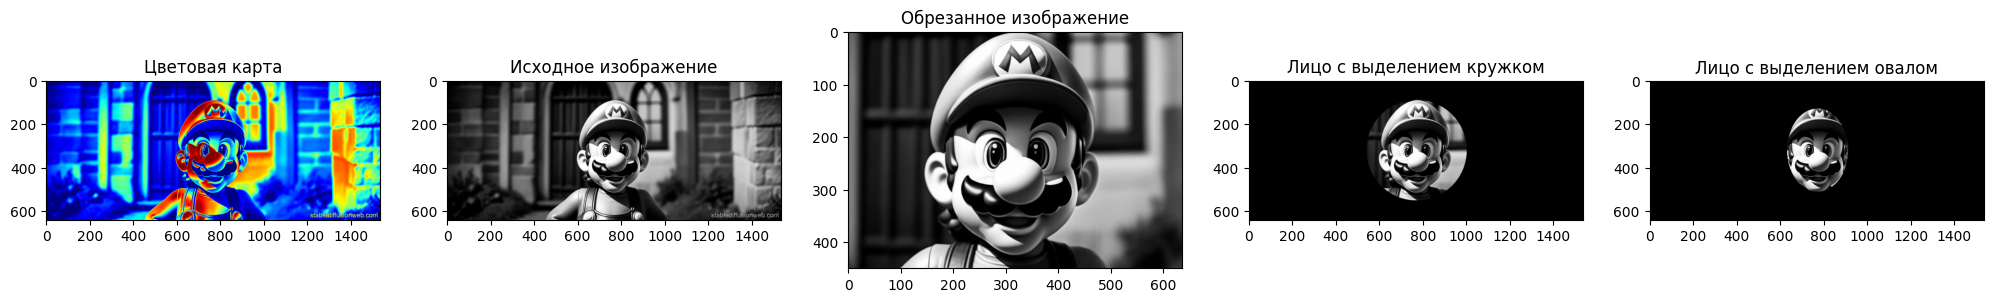

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import imageio

# Загрузка изображения
face = imageio.v3.imread('https://imgcdn.stablediffusionweb.com/2024/4/23/95575a54-348a-4b17-b61a-10f16742bd44.jpg', mode='L')

plt.figure(figsize=(25, 15))

# Цветовая карта
plt.subplot(1, 5, 1)
plt.title("Цветовая карта")
plt.imshow(face, cmap='jet')

# Исходное изображение
plt.subplot(1, 5, 2)
plt.title("Исходное изображение")
plt.imshow(face, cmap=plt.cm.gray)

# Обрезанное изображение
crop_face = face[90:-100, 450:-450]
plt.subplot(1, 5, 3)
plt.title("Обрезанное изображение")
plt.imshow(crop_face, cmap=plt.cm.gray)

# Изображение с выделенным лицом (круг)
sy, sx = 640, 1536
y, x = np.ogrid[0:sy, 0:sx]
centerx, centery = (sx // 2, sy // 2)
radius = 230
mask = ((y - centery)**2 + (x - centerx)**2) > radius**2
face_with_circle = np.copy(face)
face_with_circle[mask] = 0
plt.subplot(1, 5, 4)
plt.title("Лицо с выделением кружком")
plt.imshow(face_with_circle, cmap=plt.cm.gray)

# Изображение с выделенным лицом (овал)
a, b = 140, 190 
mask = ((y - centery)**2 / b**2 + (x - centerx)**2 / a**2) > 1
face_with_oval = np.copy(face)
face_with_oval[mask] = 0
plt.subplot(1, 5, 5)
plt.title("Лицо с выделением овалом")
plt.imshow(face_with_oval, cmap=plt.cm.gray)

plt.show()

## 2. Работа со статистикой

#### Задача

Возьмите данные из файла [populations.txt](https://scipy-lectures.org/_downloads/populations.txt) и опишите данные о популяции зайцев (hares), рысей (lynxes) и моркови (carrots) в северной Канаде за 20 лет.

Попробуйте повторить график из задания.

Попробуйте найти **без использования for-loop**:

1.	**mean** (среднее) и **std** (стандартная девиация) значение численности популяций каждого вида за годы периода.
2.	В каком году популяция каждого вида была наибольшей?
3.	Какой вид имеет наибольшую популяцию за каждый год? (argsort и np.array(['H', 'L', 'C']))
4.	В какие годы любая из популяций превышает 50000? (Подсказка: сравнение и np.any)
5.	Топ 2 года для каждого вида, когда его популяции были самыми низкими. (argsort).
6.	Сравните (постройте график) изменения численности зайцев (см. help(np.gradient)) и численности рысей. Проверьте корреляцию (см. help(np.corrcoef)).

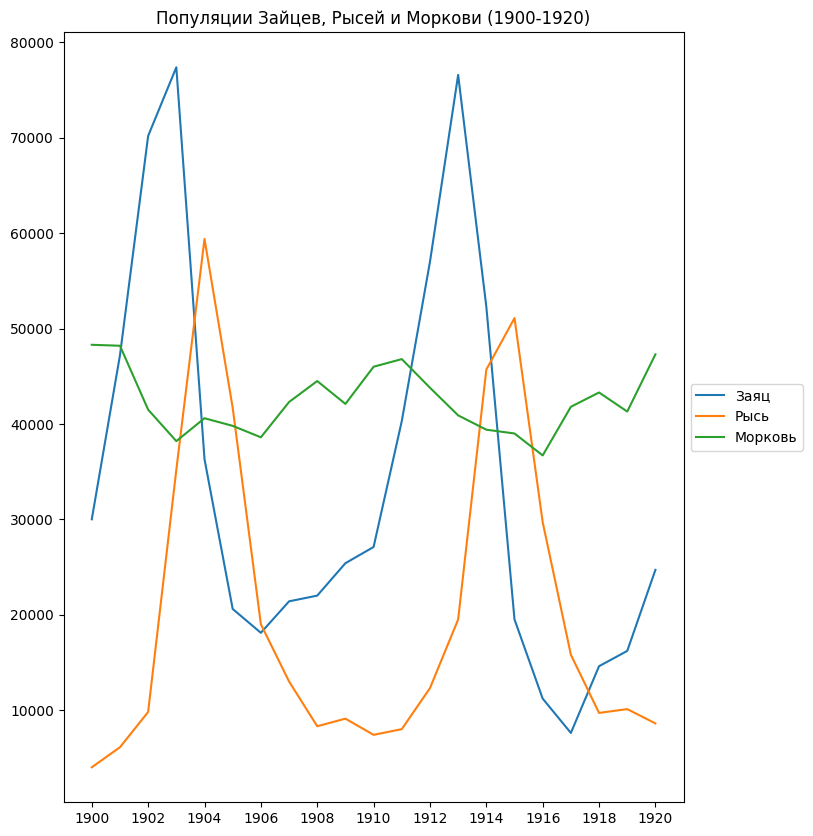

Среднее число и стандартное отклонение для Зайцев: 34080.95238095238, 20897.906458089667
Среднее число и стандартное отклонение для Рысей: 20166.666666666668, 16254.591536908763
Среднее число и стандартное отклонение для Моркови: 42400.0, 3322.5062255844787
Год с макисмальной популяцией Зайцев: 1903
Год с макисмальной популяцией Рысей: 1904
Год с макисмальной популяцией Моркови: 1900
Вид с наибольшей популяцией за каждый год: ['Морковь' 'Морковь' 'Заяц' 'Заяц' 'Рысь' 'Рысь' 'Морковь' 'Морковь'
 'Морковь' 'Морковь' 'Морковь' 'Морковь' 'Заяц' 'Заяц' 'Заяц' 'Рысь'
 'Морковь' 'Морковь' 'Морковь' 'Морковь' 'Морковь']
Года, когда любая популяция превышает 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]
Топ 2 года с наименьшей популяцией Зайцев: [1917. 1916.]
Топ 2 года с наименьшей популяцией Рысей: [1900. 1901.]
Топ 2 года с наименьшей популяцией Моркови: [1916. 1903.]


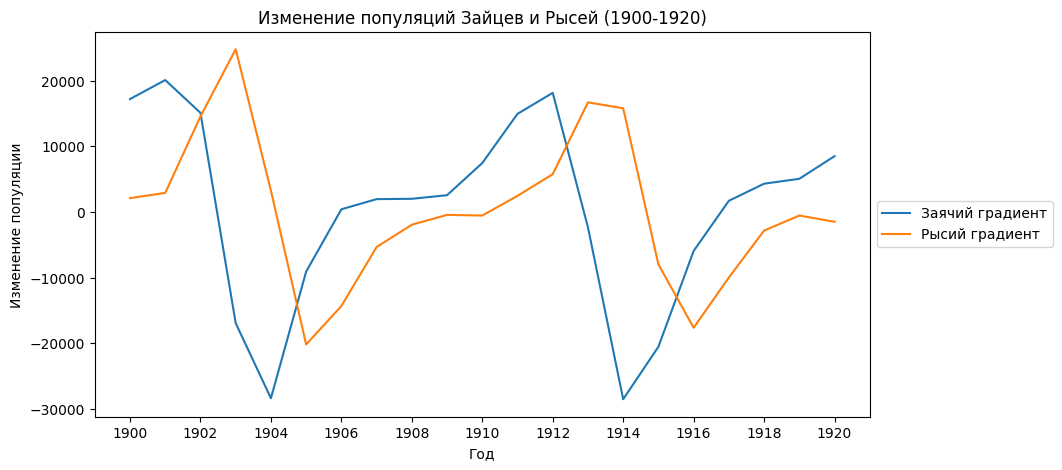

Корреляция между изменениями популяции Зайцев и Рысей: -0.05136252586288724


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
url = 'https://scipy-lectures.org/_downloads/populations.txt'
data = np.loadtxt(url)
year, hares, lynxes, carrots = data.T  # транспонируем данные для удобства

# Построение графика
plt.figure(figsize=(8, 10))
plt.plot(year, hares, label='Заяц')
plt.plot(year, lynxes, label='Рысь')
plt.plot(year, carrots, label='Морковь')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Популяции Зайцев, Рысей и Моркови (1900-1920)')
plt.xticks(year[::2])
plt.show()


# 1. Mean и std
mean_hares = np.mean(hares)
std_hares = np.std(hares)
mean_lynxes = np.mean(lynxes)
std_lynxes = np.std(lynxes)
mean_carrots = np.mean(carrots)
std_carrots = np.std(carrots)
print(f'Среднее число и стандартное отклонение для Зайцев: {mean_hares}, {std_hares}')
print(f'Среднее число и стандартное отклонение для Рысей: {mean_lynxes}, {std_lynxes}')
print(f'Среднее число и стандартное отклонение для Моркови: {mean_carrots}, {std_carrots}')

# 2. Год наибольшей популяции каждого вида
max_year_hares = year[np.argmax(hares)]
max_year_lynxes = year[np.argmax(lynxes)]
max_year_carrots = year[np.argmax(carrots)]
print(f'Год с макисмальной популяцией Зайцев: {int(max_year_hares)}')
print(f'Год с макисмальной популяцией Рысей: {int(max_year_lynxes)}')
print(f'Год с макисмальной популяцией Моркови: {int(max_year_carrots)}')

# 3. Вид с наибольшей популяцией за каждый год
populations = np.array([hares, lynxes, carrots])
max_species = np.argmax(populations, axis=0)
species_labels = np.array(['Заяц', 'Рысь', 'Морковь'])
years_max_species = species_labels[max_species]
print('Вид с наибольшей популяцией за каждый год:', years_max_species)

# 4. Года, когда любая популяция превышает 50000
years_over_50000 = year[np.any(populations > 50000, axis=0)]
print('Года, когда любая популяция превышает 50000:', years_over_50000)

# 5. Топ 2 года с наименьшей популяцией для каждого вида
top2_years_lowest_hares = year[np.argsort(hares)[:2]]
top2_years_lowest_lynxes = year[np.argsort(lynxes)[:2]]
top2_years_lowest_carrots = year[np.argsort(carrots)[:2]]
print('Топ 2 года с наименьшей популяцией Зайцев:', top2_years_lowest_hares)
print('Топ 2 года с наименьшей популяцией Рысей:', top2_years_lowest_lynxes)
print('Топ 2 года с наименьшей популяцией Моркови:', top2_years_lowest_carrots)

# 6. График изменений численности зайцев и рысей, корреляция
hare_gradient = np.gradient(hares)
lynx_gradient = np.gradient(lynxes)
plt.figure(figsize=(10, 5))
plt.plot(year, hare_gradient, label='Заячий градиент')
plt.plot(year, lynx_gradient, label='Рысий градиент')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Год')
plt.ylabel('Изменение популяции')
plt.title('Изменение популяций Зайцев и Рысей (1900-1920)')
plt.xticks(year[::2])
plt.show()
correlation = np.corrcoef(hare_gradient, lynx_gradient)[0, 1]
print(f'Корреляция между изменениями популяции Зайцев и Рысей: {correlation}')

## 3. Множество Мандельброта

#### Задание

Напишите скрипт, который нарисует множество Мандельброта на ваш вкус (в плане количества итераций).

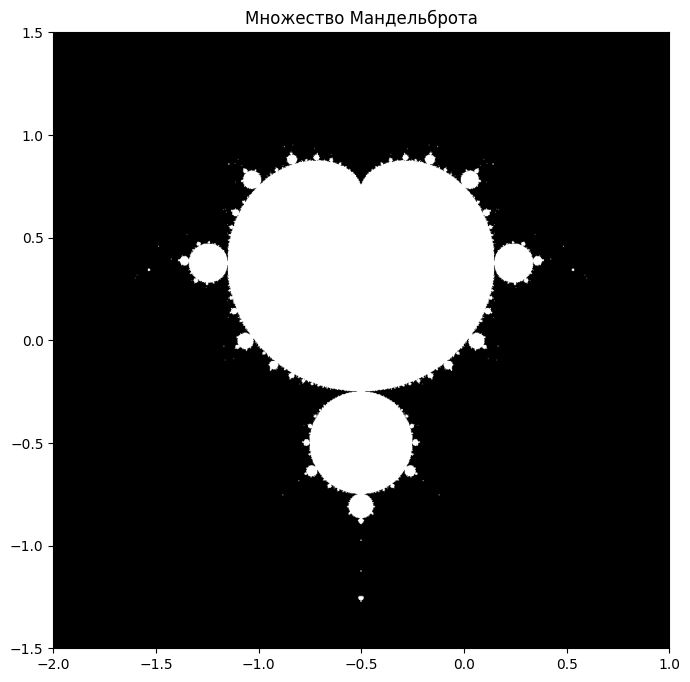

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
N_max = 500
threshold = 50

# Построение сетки
x = np.linspace(-2, 1, 1000)
y = np.linspace(-1.5, 1.5, 1000)
X, Y = np.meshgrid(x, y)
C = X + 1j * Y

# Выполнение итерации
Z = np.zeros(C.shape, dtype=complex)
mask = np.full(C.shape, True, dtype=bool)

for j in range(N_max):
    Z = Z**2 + C
    mask[np.abs(Z) > threshold] = False  # обновляем маску только для значений, выходящих за пределы порога
    Z[mask == False] = threshold  # ограничиваем значения

# Создание изображения множества Мандельброта
plt.figure(figsize=(8, 8))
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5], cmap='gray', origin='lower')
plt.title('Множество Мандельброта')
plt.savefig('mandelbrot.png')
plt.show()

## 4. Цепь Маркова - бонусное задание

Матрица переходов цепи Маркова **P** и распределение вероятностей по состояниям **p**:

1.	0 <= P[i,j] <= 1: вероятность перехода из состояния `i` в состояние `j`
2.	Правило перехода:   $p_{new} = P^T p_{old}$
3.	all(sum(P, axis=1) == 1), p.sum() == 1: нормализация
 
Напишите скрипт, который работает с 5 состояниями, а также:

1.	Строит случайную матрицу и нормализует каждую строку так, чтобы это была матрица переходов.
2.	Стартует со случайного (нормированного) распределения вероятностей p и делает 50 steps => p_50
3.	Вычисляет стационарное распределение: собственный вектор P.T с собственным значением 1 (численно: ближе всего к 1) => $p_{stationary}$
4.	Не забудьте нормировать собственный вектор!
5.	Проверьте, равны ли $p_{50}$ и $p_{stationary}$ с допуском 1e-5.

Рекомендуемые инструменты: np.random.rand, .dot(), np.linalg.eig, reductions, abs(), argmin, comparisons, all, np.linalg.norm.

In [46]:
import numpy as np

# 1. Построим случайную матрицу и нормализуем каждую строку
P = np.random.rand(5, 5)
P /= P.sum(axis=1, keepdims=True)
assert np.allclose(P.sum(axis=1), 1) # Проверим, что строки нормализованы

# 2. Стартуем со случайного нормированного распределения вероятностей
p = np.random.rand(5)
p /= p.sum()

# Переходы по матрице
for _ in range(50):
    p = np.dot(P.T, p)
p_50 = p

# 3. Вычисление стационарного распределения
eigenvalues, eigenvectors = np.linalg.eig(P.T)
stationary_vector = eigenvectors[:, np.isclose(eigenvalues, 1)] # Ищем собственный вектор, соответствующий собственному значению 1

# Нормируем собственный вектор
p_stationary = stationary_vector[:, 0].real
p_stationary /= p_stationary.sum()

equal = np.allclose(p_50, p_stationary, atol=1e-5) # 5. Проверка равенства p_50 и p_stationary с допуском 1e-5

# Вывод результатов
print("Матрица переходов P:\n", P)
print("\np_50:", p_50)
print("\np_stationary:", p_stationary)
print("\nРавны ли p_50 и p_stationary при точности 1e-5?:", equal)

Матрица переходов P:
 [[0.29022533 0.0687498  0.23725433 0.28283205 0.12093848]
 [0.18042569 0.25647343 0.05181692 0.28408205 0.22720191]
 [0.27519553 0.08371818 0.25778152 0.09823325 0.28507152]
 [0.19841545 0.15957339 0.23353782 0.26852151 0.13995183]
 [0.36453044 0.03410534 0.08573551 0.26625628 0.24937242]]

p_50: [0.26783364 0.10687712 0.19121275 0.24101882 0.19305767]

p_stationary: [0.26783364 0.10687712 0.19121275 0.24101882 0.19305767]

Равны ли p_50 и p_stationary при точности 1e-5?: True


## 5. Орбиты - бонусное задание (будет зачтено как отдельный плюс помимо бонусного задания выше, если выполнено корректно)

Рассмотрим физику небесных тел, а именно, орбиты. Для этого нам необходимо решить второй закон Ньютона вместе с законом всемирного тяготения Ньютона. Если ограничиться плоскостью x-y, то необходимо решить 4 задачи: $x$, $y$, $v_x$ и $v_y$. Эти величины изменяются в соответствии с:
$$\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}$$

Чтобы проинтегрировать их во времени, необходимо задать начальное условие для каждой величины. Настроим нашу систему так, чтобы Солнце находилось в начале координат (это будет один фокус), а планета начиналась в [перигелии](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B8%D0%B3%D0%B5%D0%BB%D0%B8%D0%B9) и двигалась по орбите против часовой стрелки.

![движениепланеты](https://sbu-python-class.github.io/python-science/_images/orbit_setup.png)
 
Расстояние перигелия от фокуса составляет:
$$r_p = a (1 - e)$$
 
где $a$ - [полу-мажорная ось](https://www.pngwing.com/ru/free-png-trodk) (смотреть пояснения на Wikipedia):

![полумажор](https://upload.wikimedia.org/wikipedia/commons/7/76/An_image_describing_the_semi-major_and_semi-minor_axis_of_ellipse.svg)
 
, а $e$ - [эксцентриситет](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B8%D1%81%D0%B8%D1%82%D0%B5%D1%82) (смотреть пояснения на Wikipedia):
 
![эксц](https://upload.wikimedia.org/wikipedia/commons/0/05/Eccentricity.png)

![gif](https://upload.wikimedia.org/wikipedia/commons/3/36/Cubic_surface.gif)

Перигелийная скорость направлена в сторону $y$ и составляет:
$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$
 
Мы будем работать в астрономических единицах AU, годах и солнечных массах, в этом случае $GM_\star = 4\pi^2$ (для Солнца).
 
Ваши изначальные параметры должны быть:
  * $x(t=0) = r_p$
  * $y(t=0) = 0$
  * $v_x(t=0) = 0$
  * $v_y(t=0) = v_p$
 
Начальные условия должны быть такими:

```python
def rhs(t, Y, GM=4*np.pi**2):
    """RHS для орбит, Y вектор решения, содержащий
    x, y, v_x, и v_y"""

    x, y, vx, vy = Y
    f = np.zeros_like(Y)

    # dx/dt = vx
    f[0] = vx

    # dy/dt = vy
    f[1] = vy

    # d(vx)/dt = -GMx/r**3
    r = np.sqrt(x**2 + y**2)
    f[2] = -GM*x/r**3

    # d(vy)/dt = -GMy/r**3
    f[3] = -GM*y/r**3

    return f
```

Воспользуйтесь методами интегрирования SciPy ODE для интегрирования орбиты и построения графика.

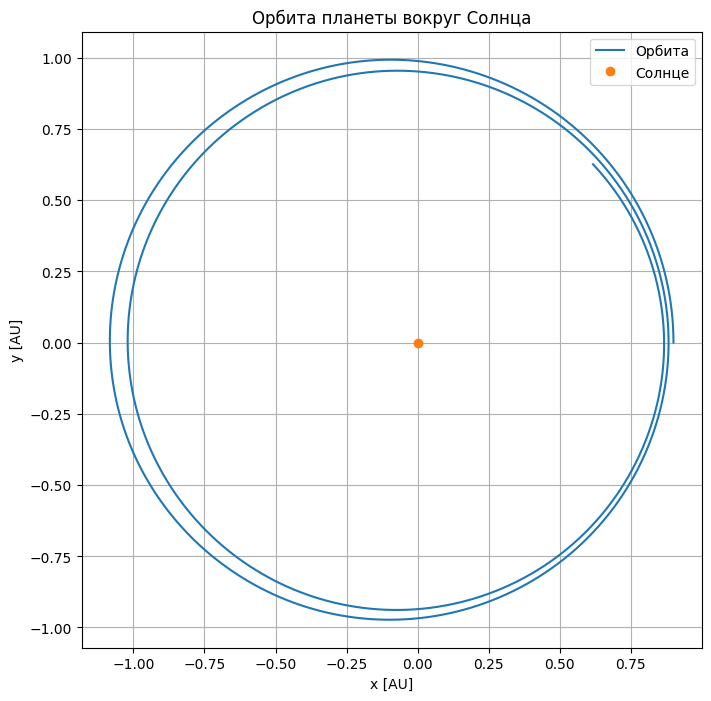

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp # для интегрирования

# Начальные параметры
a = 1    # AU
e = 0.1  # эксцентриситет
r_p = a * (1 - e)
v_p = np.sqrt((4 * np.pi**2 * a * (1 + e)) / (1 - e))
x0, y0 = r_p, 0
vx0, vy0 = 0, v_p
Y0 = [x0, y0, vx0, vy0]

def rhs(t, Y, GM=4*np.pi**2):
    """RHS для орбит, Y вектор решения, содержащий
    x, y, v_x, и v_y"""

    x, y, vx, vy = Y
    f = np.zeros_like(Y)

    # dx/dt = vx
    f[0] = vx

    # dy/dt = vy
    f[1] = vy

    # d(vx)/dt = -GMx/r**3
    r = np.sqrt(x**2 + y**2)
    f[2] = -GM * x / r**3

    # d(vy)/dt = -GMy/r**3
    f[3] = -GM * y / r**3

    return f


t_span = [0, 2]  # интегрируем на 2 года
t_eval = np.linspace(t_span[0], t_span[1], 1000)

solution = solve_ivp(rhs, t_span, Y0, t_eval=t_eval)
x = solution.y[0]
y = solution.y[1]

plt.figure(figsize=(8, 8))
plt.plot(x, y, label='Орбита')
plt.plot(0, 0, 'o', label='Солнце')  # Солнце в начале координат
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Орбита планеты вокруг Солнца')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()